sclaer: https://mkjjo.github.io/python/2019/01/10/scaler.html


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import collections

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import optuna

import plotly

import umap

In [2]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
train_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [3]:
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)
valid_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


# scaling

In [4]:
v_columns = [f'V{i}' for i in range(1,31)]

In [5]:
scaler = MaxAbsScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
# sclaer = StandardScaler()
scaler.fit(train_df[v_columns])
train_df[v_columns] = scaler.transform(train_df[v_columns])
valid_df[v_columns] = scaler.transform(valid_df[v_columns])

# validation data 분석

In [6]:
colors = ['#0101DF', '#DF0101']

In [7]:
print('No Frauds', round(valid_df['Class'].value_counts()[0]/len(valid_df) * 100,2), '% of the dataset')
print('Frauds', round(valid_df['Class'].value_counts()[1]/len(valid_df) * 100,2), '% of the dataset')

X = valid_df.drop('Class', axis=1)
y = valid_df['Class']

# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#     original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# # We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# # original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the Distribution of the labels


# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

No Frauds 99.89 % of the dataset
Frauds 0.11 % of the dataset


In [8]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

valid_df = valid_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = valid_df.loc[valid_df['Class'] == 1]
non_fraud_df = valid_df.loc[valid_df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_valid_df = normal_distributed_df.sample(frac=1, random_state=42)

new_valid_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
677,0.015199,0.056300,-0.228750,0.447526,0.023094,-0.104385,-0.033969,0.010659,-0.175017,-0.161628,...,0.016361,0.005370,-0.058329,-0.097605,0.139721,0.055526,0.004386,-0.001629,-0.868652,1
25042,-0.009083,0.066383,-0.245698,0.444725,0.008724,-0.078558,-0.066642,0.028090,-0.338298,-0.215468,...,-0.051704,-0.000209,-0.283488,-0.000626,0.169260,0.050188,0.003738,-0.001647,0.798715,1
19616,-0.013915,0.011850,0.039659,-0.042499,0.003273,0.007778,0.007331,-0.000770,0.044199,-0.016108,...,0.080233,-0.007789,-0.180493,-0.016660,0.121159,-0.037413,0.003658,-0.000932,0.532579,0
27,0.012884,-0.007262,0.001552,0.083294,-0.002945,0.015890,0.005892,0.001671,-0.000225,-0.002553,...,-0.011459,-0.006882,-0.067284,0.058707,-0.106976,-0.000354,0.001202,0.015748,-0.959305,0
1196,-0.290173,0.126846,-0.717030,0.718248,-0.224496,-0.093670,-0.384187,0.027172,-0.468044,-0.532828,...,0.113042,0.026518,-0.260308,-0.003455,0.213157,0.190629,-0.041856,-0.001629,-0.723784,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


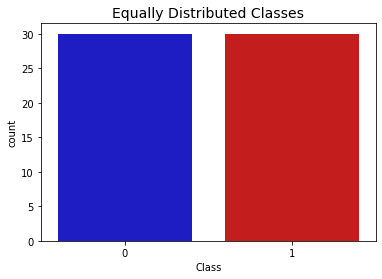

In [9]:
print('Distribution of the Classes in the subsample dataset')
print(new_valid_df['Class'].value_counts()/len(new_valid_df))

sns.countplot('Class', data=new_valid_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

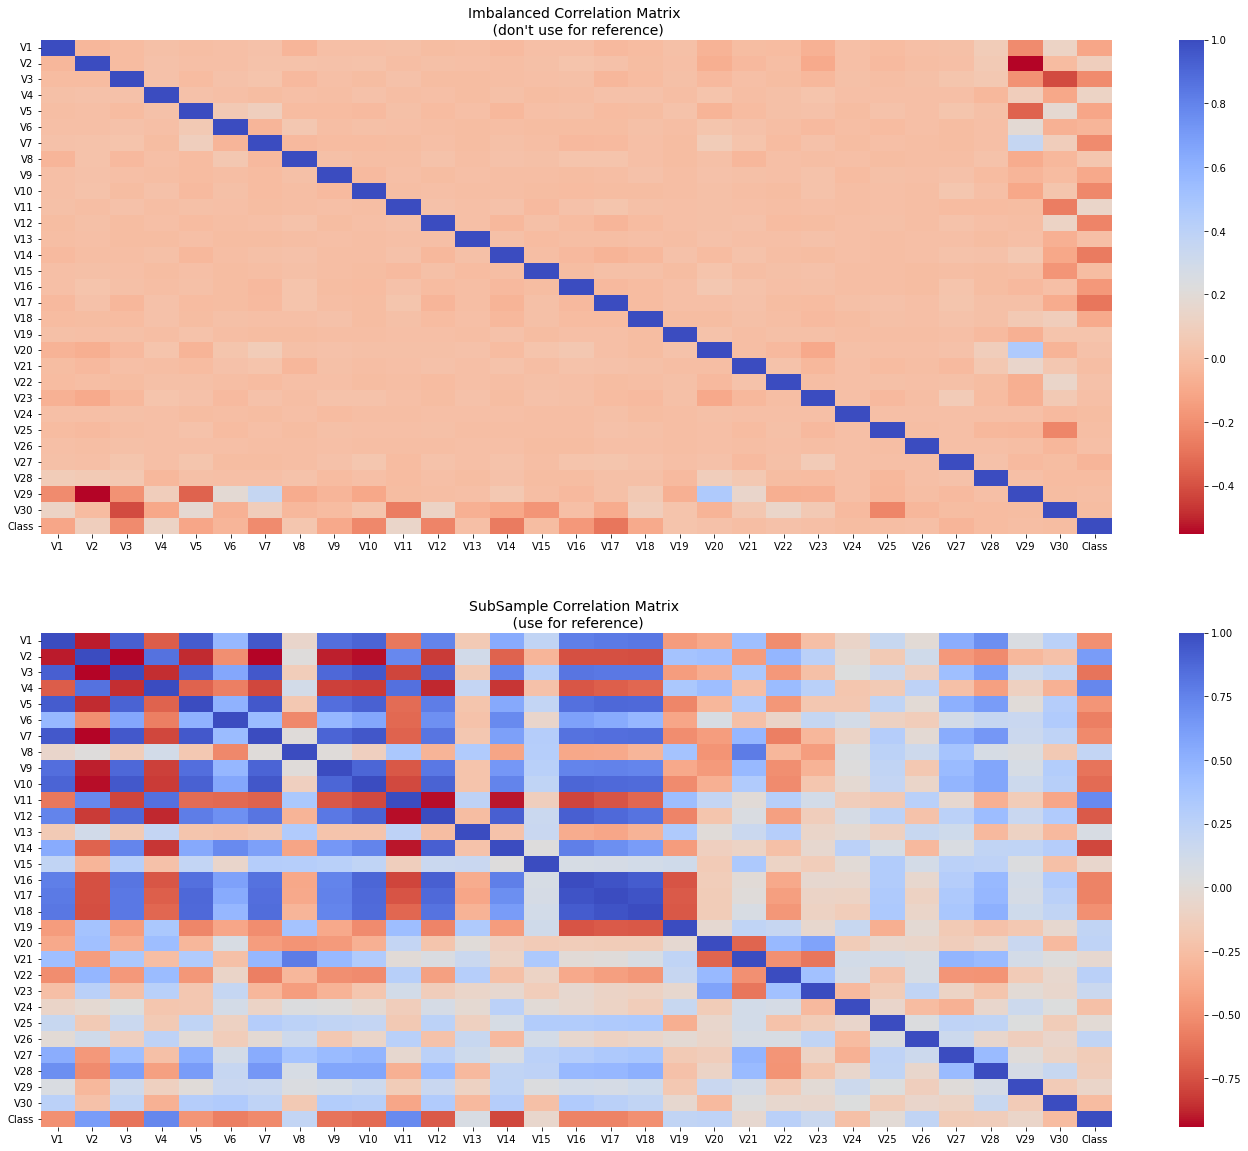

In [10]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = valid_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_valid_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [11]:
key_reverse = list(sub_sample_corr['Class'][:-1].sort_values().keys())

In [12]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    print(idx, k, v)

0 V14 -0.7843960875457404
1 V12 -0.7139580332083814
2 V10 -0.6577390131223071
3 V3 -0.6201229998114389
4 V9 -0.6169163821741401
5 V6 -0.5761268204471411
6 V16 -0.5595728865308565
7 V17 -0.5550211789390674
8 V7 -0.5293482730458026
9 V18 -0.4976618579131048
10 V1 -0.49512544482091975
11 V5 -0.47681975040710844
12 V30 -0.2677717506836077
13 V24 -0.23798442643991397
14 V27 -0.15558340295851214
15 V28 -0.13958050107505038
16 V29 -0.07514807214095914
17 V15 -0.05991321845673256
18 V21 -0.03999810562294697
19 V25 -0.0141878194090814
20 V13 0.06862597290485149
21 V23 0.1617783236726124
22 V8 0.20977144560741434
23 V19 0.21340676584054638
24 V26 0.2191353513126261
25 V20 0.22891258876469608
26 V22 0.26092325638799607
27 V2 0.6221318229928594
28 V11 0.7130697062759742
29 V4 0.7300204792659295


In [13]:
a = key_reverse[:12]
b = key_reverse[-3:]
use_columns = a + b
print(a)
print(b)
print(len(use_columns))

['V14', 'V12', 'V10', 'V3', 'V9', 'V6', 'V16', 'V17', 'V7', 'V18', 'V1', 'V5']
['V2', 'V11', 'V4']
15


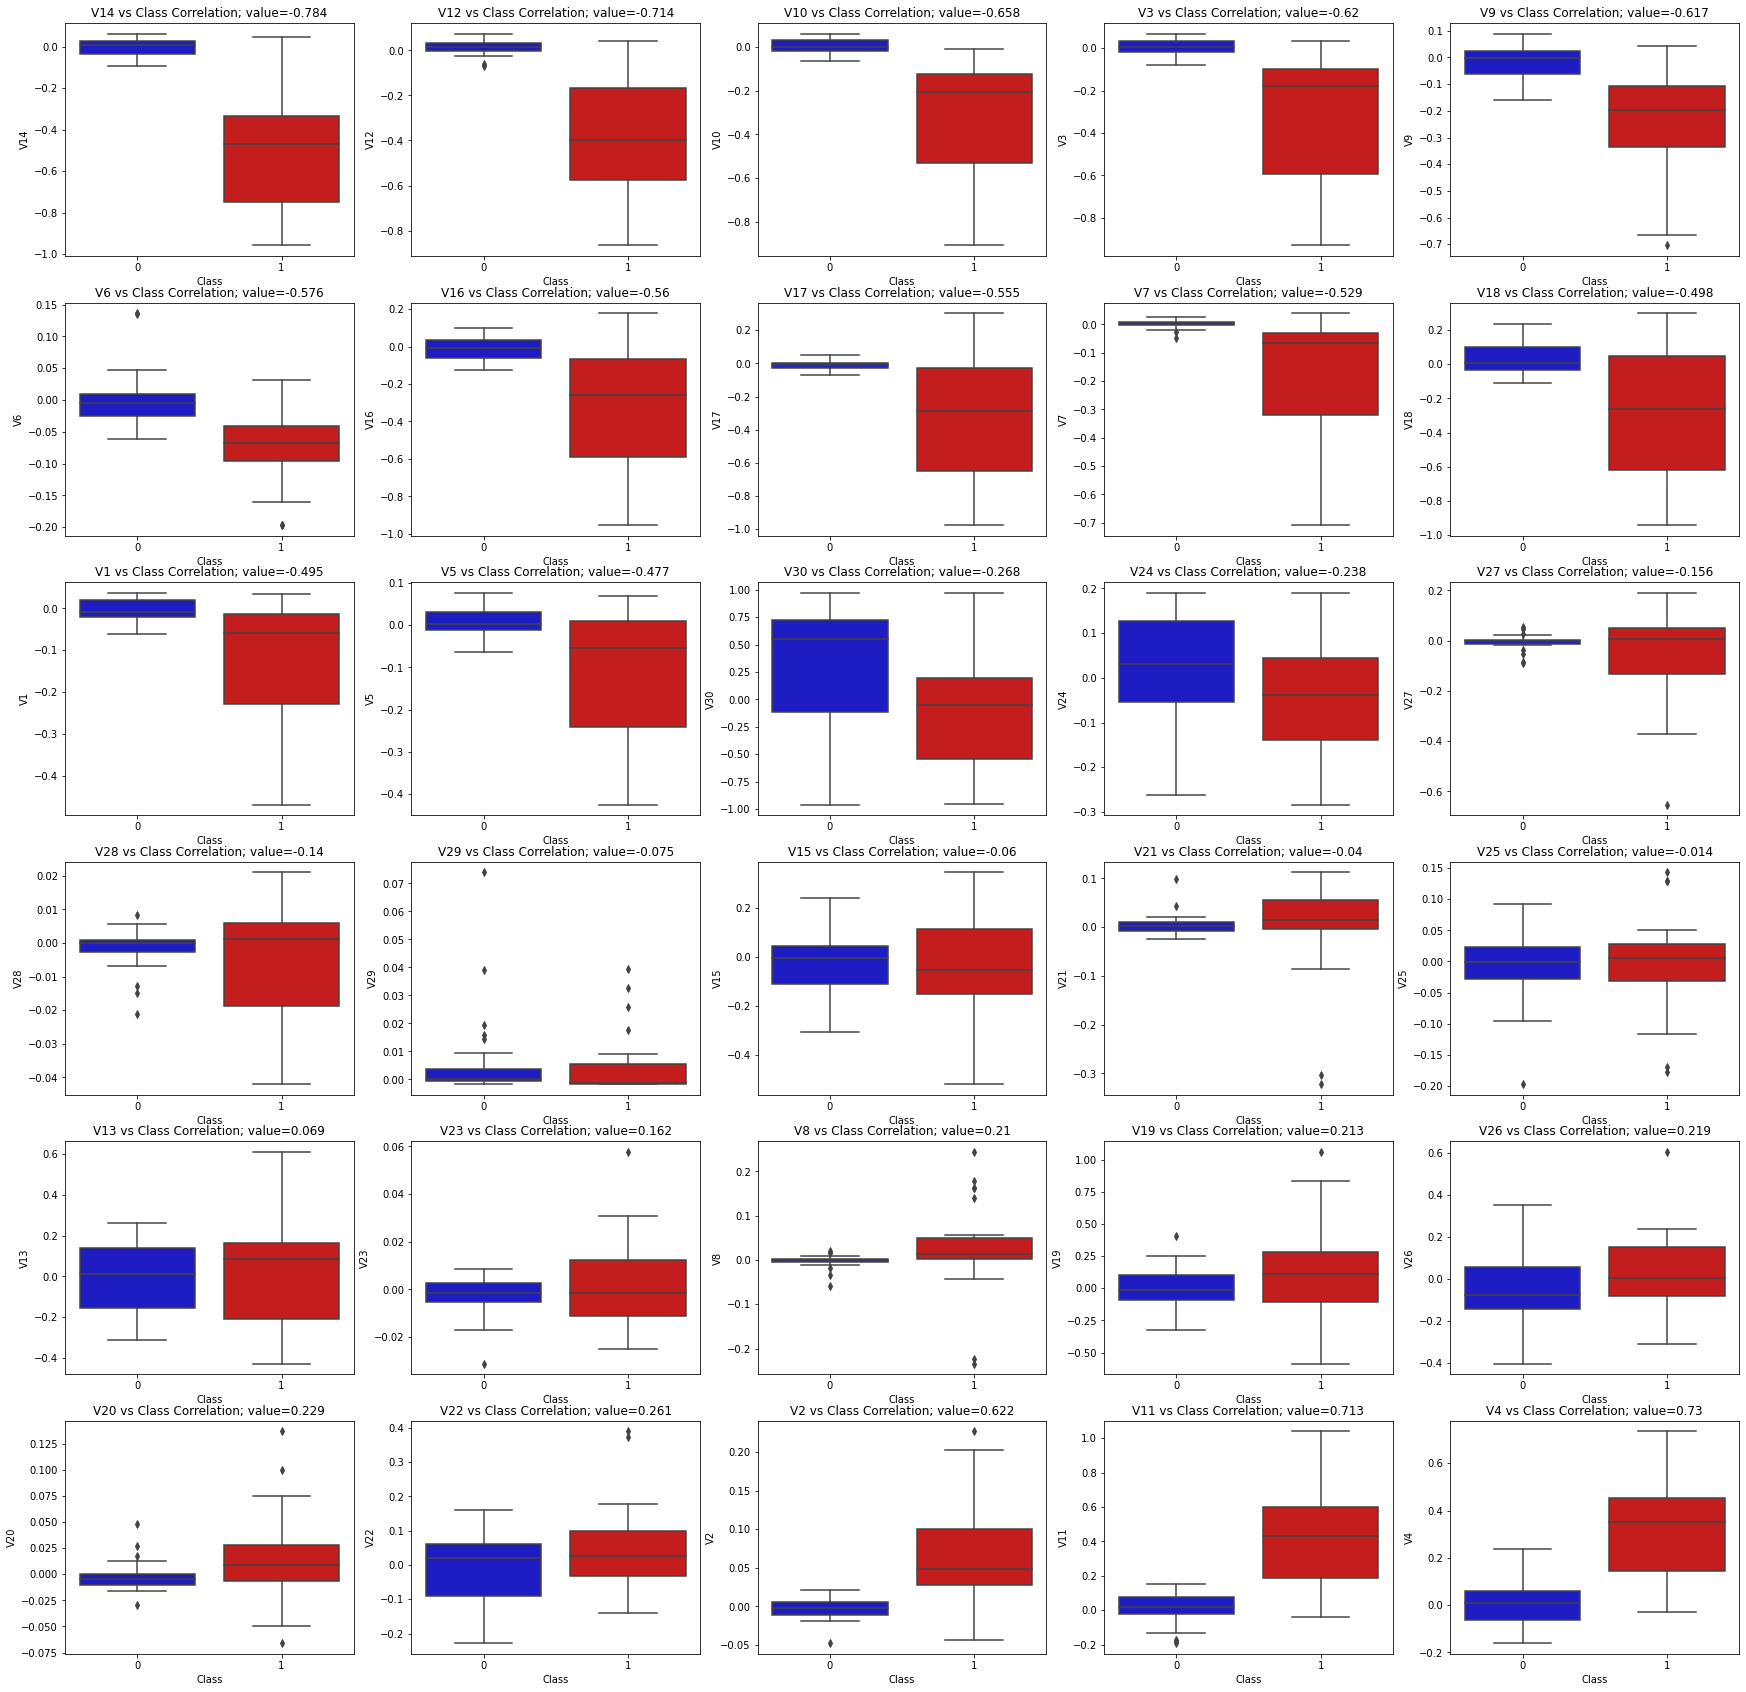

In [14]:
f, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,30))

for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    i, j = divmod(idx, 5)
    sns.boxplot(x="Class", y=k, data=new_valid_df, palette=colors, ax=axes[i, j])
    axes[i,j].set_title(f'{k} vs Class Correlation; value={round(v,3)}')

In [15]:
# from scipy.stats import norm

# f, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,30))

# for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
#     # print(idx, k, v)
#     i, j = divmod(idx, 5)
#     v_fraud_dist = new_valid_df[k].loc[new_valid_df['Class'] == 1].values
#     sns.distplot(v_fraud_dist, ax=axes[i,j], fit=norm, color='#FB8861')
#     axes[i,j].set_title(f'{k} Distribution', fontsize=14)

In [16]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values()[:5].items()):
    v_fraud = new_valid_df[k].loc[new_valid_df['Class']==1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print(f'iqr: {v_iqr}')
    
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print(f'Cut off: {v_cut_off}')
    print(f'{k} Lower: {v_lower}')
    print(f'{k} upper: {v_upper}')
    
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print(f'Feature {k} Outliers for Fraud Cases: {len(outliers)}'.format())
    print(f'{k} outliers:{outliers}')

    new_valid_df = new_valid_df.drop(new_valid_df[(new_valid_df[k] > v_upper) | (new_valid_df[k] < v_lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_valid_df)))
    print('----' * 44)

Quartile 25: -0.746733224874017 | Quartile 75: -0.33479639988945925
iqr: 0.4119368249845578
Cut off: 0.6179052374768367
V14 Lower: -1.3646384623508538
V14 upper: 0.2831088375873774
Feature V14 Outliers for Fraud Cases: 0
V14 outliers:[]
Number of Instances after outliers removal: 60
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.5772580118123027 | Quartile 75: -0.1689270624257557
iqr: 0.408330949386547
Cut off: 0.6124964240798205
V12 Lower: -1.1897544358921233
V12 upper: 0.4435693616540648
Feature V12 Outliers for Fraud Cases: 0
V12 outliers:[]
Number of Instances after outliers removal: 60
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.5319465889009106 | Quartile 75: -0.12153552210113205
iqr: 0.410

In [17]:
# New_df is from the random undersample data (fewer instances)
X = new_valid_df.drop('Class', axis=1)[use_columns]
y = new_valid_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='pca').fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


T-SNE took 0.43 s
PCA took 0.00067 s
Truncated SVD took 0.0019 s


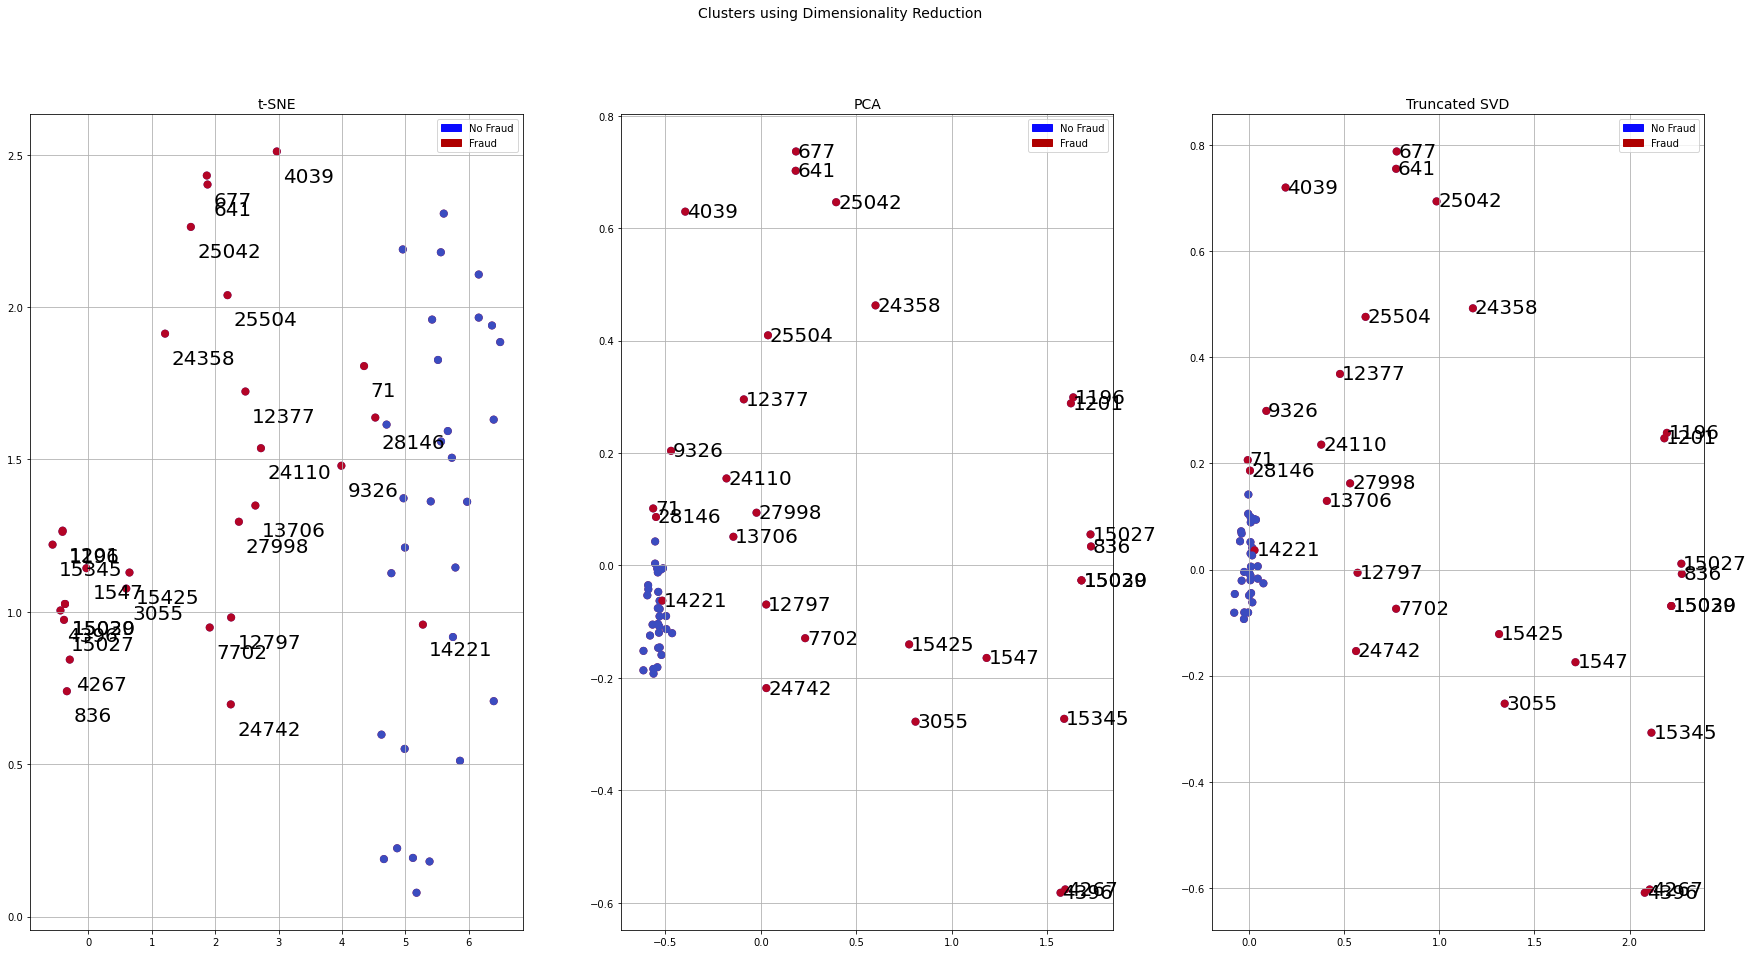

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,15))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax1.annotate(y.keys()[i], (X_reduced_tsne[i,0]+0.1, X_reduced_tsne[i,1]-0.1), fontsize=20)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax2.annotate(y.keys()[i], (X_reduced_pca[i,0]+0.01, X_reduced_pca[i,1]-0.01), fontsize=20)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
for i in range(len(y)):
    if y.iloc[i]==1:
        # ax1.text(X_reduced_tsne[i,0], X_reduced_tsne[i,1], s=y.keys()[i], fontsize=15)
        ax3.annotate(y.keys()[i], (X_reduced_svd[i,0]+0.01, X_reduced_svd[i,1]-0.01), fontsize=20)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# KNN labeling

In [19]:
# use_columns = v_columns

In [20]:
print(f'v cnt: {len(use_columns)} ::::', end=' ')
for c in use_columns:
    print(c, sep='', end=' ')

v cnt: 15 :::: V14 V12 V10 V3 V9 V6 V16 V17 V7 V18 V1 V5 V2 V11 V4 

In [21]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)

In [22]:
train_df = train_df[use_columns]
valid_df = valid_df[use_columns+['Class']]

In [23]:
scaler = MaxAbsScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler.fit(train_df[use_columns])
train_df[use_columns] = scaler.transform(train_df[use_columns])
valid_df[use_columns] = scaler.transform(valid_df[use_columns])

In [24]:
fraud_ratio = valid_df['Class'].value_counts()[1]/len(valid_df)
fraud_ratio

0.0010540369615627855

In [25]:
X = valid_df.drop('Class', axis=1).values
y = valid_df['Class'].values

In [26]:
# print(len(y[y==0]), len(y[y==1]))

# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

In [27]:
# 차원 축소해서 knn으로 라벨링

# reducer = umap.UMAP(n_components=5)
# X = reducer.fit_transform(X)
# X.shape

In [28]:
# plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     c=[sns.color_palette()[x] for x in y])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Fraud dataset', fontsize=24)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute', n_jobs=-1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=1,
                     weights='distance')

In [30]:
# t = reducer.transform(train_df.values)
probs = neigh.predict_proba(train_df.values)

In [31]:
neigh.predict(train_df.values).sum()

121

In [32]:
cnt = 0
train_class = np.zeros(len(train_df), dtype=int)
for idx in np.flip(np.argsort(probs[:,1])):
    cnt += 1
    if probs[idx,1] < 0.5:
        break
    # if probs[idx,1] <= 0:
    #     break
    train_class[idx] = 1
train_df['Class'] = train_class

In [33]:
print(train_df['Class'].value_counts())
scale_pos_weight = train_df['Class'].value_counts()[0] / train_df['Class'].value_counts()[1]
print(scale_pos_weight)

0    113721
1       121
Name: Class, dtype: int64
939.8429752066115


# train

In [34]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']

# stratSplit = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# for train_index, test_index in stratSplit.split(X,y):
#     print("Train:", train_index.shape, "Test:", test_index.shape)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train) * 100)
#     print(len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_train[y_train==1])/len(y_train)* 100)
#     break


In [35]:
# # SMOTE unlael 데이터 확장
# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

In [36]:
def RF_objective(trial: optuna.trial.Trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric':'auc',
        'booster':'gbtree',
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000, step=10),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        
        'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
        # "tree_method": 'exact', 'gpu_id': -1,  # CPU 사용시
        
        "gamma": trial.suggest_float("gamma", 0.1, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-2, 1),
        'scale_pos_weight': scale_pos_weight
        # 'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 5, 20, step=5)
        
        # "learning_rate": trial.suggest_uniform('learning_rate', 0.0001, 0.99),
        # 'num_parallel_tree': trial.suggest_int("num_parallel_tree", 1, 500) 추가하면 느려짐.
    }

    model = xgb.XGBClassifier(**params, random_state = 42, use_label_encoder = False, n_jobs=-1)
    
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1)
    f1_mean = score.mean()

    return f1_mean

In [37]:
# optuna.logging.set_verbosity(optuna.logging.WARNING)

In [38]:
#Execute optuna and set hyperparameters
RF_study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
RF_study.optimize(RF_objective, n_trials=1000)

[I 2022-07-15 03:50:03,219] A new study created in memory with name: no-name-7b11ff6f-d940-4014-83a2-f2ccf451c9af
[I 2022-07-15 03:50:06,786] Trial 0 finished with value: 0.8963165905631657 and parameters: {'n_estimators': 600, 'max_depth': 6, 'gamma': 0.9988150256267823, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 0.8683983839414233, 'colsample_bylevel': 0.6355713668886234, 'colsample_bynode': 0.6982281737934359, 'reg_lambda': 0.3230248375909628, 'reg_alpha': 0.1361192164914475}. Best is trial 0 with value: 0.8963165905631657.
[I 2022-07-15 03:50:08,855] Trial 1 finished with value: 0.8728513444951801 and parameters: {'n_estimators': 110, 'max_depth': 10, 'gamma': 0.16591150096961726, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.5210037283886122, 'colsample_bylevel': 0.6500063682558743, 'colsample_bynode': 0.9508296864175793, 'reg_lambda': 0.02559488079036814, 'reg_alpha': 0.055403821191950524}. Best is trial 0 with value: 0.8963165905631657.
[I 2022

In [47]:
RF_study.best_params

{'n_estimators': 460,
 'max_depth': 4,
 'gamma': 0.7155935590497422,
 'min_child_weight': 1,
 'subsample': 0.95,
 'colsample_bytree': 0.8516143607917493,
 'colsample_bylevel': 0.8499089569307289,
 'colsample_bynode': 0.7783533814866374,
 'reg_lambda': 0.20646353054278152,
 'reg_alpha': 0.031101827218005206}

In [48]:
#Create an instance with tuned hyperparameters
rfc = xgb.XGBClassifier(**RF_study.best_params, objective='binary:logistic', eval_metric='auc', booster='gbtree', scale_pos_weight=scale_pos_weight, random_state = 42, use_label_encoder = False, n_jobs=-1)

In [49]:
rfc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8499089569307289,
              colsample_bynode=0.7783533814866374,
              colsample_bytree=0.8516143607917493, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc',
              gamma=0.7155935590497422, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=460,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.031101827218005206, reg_lambda=0.20646353054278152, ...)

In [50]:
y_pred = rfc.predict(X)

In [51]:
# rfc.predict_proba(X_test)

In [52]:
print(classification_report(y, y_pred, target_names=['No Frauds', 'Frauds']))

              precision    recall  f1-score   support

   No Frauds       1.00      1.00      1.00    113721
      Frauds       1.00      1.00      1.00       121

    accuracy                           1.00    113842
   macro avg       1.00      1.00      1.00    113842
weighted avg       1.00      1.00      1.00    113842



In [55]:
classification_report(y, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)

{'No Frauds': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 113721},
 'Frauds': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 121},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 113842},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 113842}}

In [54]:
f1score = classification_report(y, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

1.0

# inference

In [56]:
test_df = pd.read_csv('./data/test.csv')
ids = test_df['ID']
test_df = test_df[use_columns]

In [57]:
test_df

,V14,V12,V10,V3,V9,V6,V16,V17,V7,V18,V1,V5,V2,V11,V4
0,-0.311169,-0.617801,0.090794,2.536347,0.363787,0.462388,-0.470401,0.207971,0.239599,0.025791,-1.359807,-0.338321,-0.072781,-0.551600,1.378155
1,-0.143772,1.065235,-0.166974,0.166480,-0.255425,-0.082361,0.463917,-0.114805,-0.078803,-0.183361,1.191857,0.060018,0.266151,1.612727,0.448154
2,-1.119670,0.538196,0.753074,1.548718,0.817739,0.095921,-0.451449,-0.237033,0.592941,-0.038195,-1.158233,-0.407193,0.877737,-0.822843,0.403034
3,0.167372,-0.153826,-0.099254,0.045371,0.464960,0.272708,-0.443587,0.002821,-0.005159,-0.611987,1.229658,0.191881,0.141004,-1.416907,1.202613
4,0.362832,-0.326143,0.309755,-0.874300,-0.558895,3.317027,-0.129487,-0.809979,0.470455,0.359985,0.384978,2.924584,0.616109,-0.259116,-0.094019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,1.122674,-0.453235,-0.111640,-0.635891,-0.285670,-1.014307,-1.431897,0.939328,0.427126,-0.002373,0.219529,-0.152971,0.881246,-1.109232,0.960928
142499,-0.858719,0.453596,-0.594242,1.189786,1.159498,5.519980,-0.644646,0.447184,-1.518185,0.388721,-1.775135,1.196063,-0.004235,-1.264072,0.331096
142500,-0.675143,0.915802,-0.975926,2.035030,0.584800,1.058415,-0.711757,-0.025693,0.024330,-1.221179,-0.732789,0.868229,-0.055080,-0.150189,-0.738589
142501,-0.510602,0.063119,-0.484782,-3.249640,0.432454,3.031260,0.140716,0.313502,-0.296827,0.395652,1.919565,2.630515,-0.301254,0.411614,-0.557828


In [58]:
test_df[use_columns] = scaler.transform(test_df[use_columns])

In [59]:
y_pred = rfc.predict(test_df)

In [60]:
print(len(y_pred[y_pred==0]))
print(len(y_pred[y_pred==1]))
print(len(y_pred[y_pred==1])/len(y_pred))
inference_fraud_ratio = len(y_pred[y_pred==1])/len(y_pred) * 100
print(inference_fraud_ratio)

142199
304
0.002133288421998133
0.21332884219981332


In [61]:
test_df['Class'] = y_pred
test_df['ID'] = ids

In [62]:
path = f'./xgboost-{round(inference_fraud_ratio,5)}-{round(f1score, 4)}.csv'
print(path)

./xgboost-0.21333-1.0.csv


In [63]:
test_df.to_csv(path, columns=['ID','Class'], index=False)